# Factor analysis using Python 

This Jupyter Notebook is available for you to walk through the steps of performing a factor analysis in Python using a case data set. 

You will start by loading the packages that you require:

The "import" command fetches the stored packages and loads them to your interface.
Using the "as" command names the packages to make your code more succinct and usable. 

You may need to install the packages first. This requires a command called a "!pip install". In this command, "pip" refers to the package manager, whereas "install" requests the installation.

In [1]:
#First if you dont have these packages installed 
!pip install factor_analyzer
!pip install pyreadstat 
import matplotlib.pyplot as plt

import pandas as pd 
import numpy as np
from factor_analyzer import FactorAnalyzer # What we will use for factor analysis
import pyreadstat # dependancy for for reading sav's

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


When you wish to call any pandas function, you will type pd.<function> The abbreviation "pd." will access the package and then you can type the function's name that you wish to call. For example, you will type pd.read_spss("").

In [2]:
LOANS = pd.read_spss("LOANS.sav")
LOANS.tail()

,age,education,year_emp,income,debt_income,cred_debt,other_debt,loan,location,risk_score
95,41.0,Primary,1.0,19000.0,4.4,242.0,594.0,No,Durban,69.82
96,34.0,Primary,12.0,68000.0,25.1,7817.0,9251.0,Yes,Johannesburg,43.61
97,27.0,Primary,5.0,26000.0,1.2,130.0,182.0,No,Durban,77.79
98,24.0,Secondary,2.0,26000.0,9.7,888.0,1634.0,Yes,Johannesburg,83.45
99,24.0,Primary,2.0,21000.0,0.6,25.0,101.0,No,Cape Town,93.06


You will notice that Python automatically pulls the first 5 rows of the dataset, with the different variables shown in each column. 

The analysis will be performed on the Speedy Loans case data set, which you used in Tableau in the previous modules. As a reminder, the variables that were recorded in this data set are described below:

**age** – Age of the applicant in years: Integer numeric

**education** – The education level of the applicant categorised as "Primary", "Secondary", "Some tertiary", and "Full tertiary": Ordinal categorical

**year_emp** – Number of years with current employer: Integer numeric

**income** – Average monthly income in South African Rands: Continuous numeric

**debt_income** – Debt-to-income ratio: Continuous numeric

**cred_debt** – Average monthly credit card debt in South African Rands: Continuous numeric

**other_debt** – Average monthly other debts in South African Rands: Continuous numeric

**loan** – 1 = Bank approved loan, 0 = Bank did not approve loan: Binary categorical

**location** – Geographical location: either "Cape Town", "Johannesburg", or "Durban": Categorical

**risk_score** – Credit risk score out of 100 for each applicant: Continuous numeric

We will define our independent variables to be numeric only. This means we will exclude the education, loan, and location variables. 

In [3]:
# REMEMBER: python is zero indexed, so the first variable "age" is indexed as variable "0" 
X = LOANS.iloc[:,pd.np.r_[0, 2:7, 9]].astype(float) 

X.dtypes # This shows the variable types ensuring that you are working with numerical variables only

age            float64
year_emp       float64
income         float64
debt_income    float64
cred_debt      float64
other_debt     float64
risk_score     float64
dtype: object

Next, you will generate a correlation matrix in order to test whether any multicollinearity exists between the variables within the dataset.

In [4]:
Xcorr = X.corr() # correlation matrix
Xcorr

,age,year_emp,income,debt_income,cred_debt,other_debt,risk_score
age,1.000000,0.494176,0.552017,-0.000036,0.240627,0.366919,-0.544468
year_emp,0.494176,1.000000,0.707939,0.084868,0.442967,0.462382,-0.516489
income,0.552017,0.707939,1.000000,-0.004948,0.552393,0.511341,-0.599133
debt_income,-0.000036,0.084868,-0.004948,1.000000,0.646941,0.727518,0.208019
cred_debt,0.240627,0.442967,0.552393,0.646941,1.000000,0.747201,-0.193568
other_debt,0.366919,0.462382,0.511341,0.727518,0.747201,1.000000,-0.168682
risk_score,-0.544468,-0.516489,-0.599133,0.208019,-0.193568,-0.168682,1.000000


Do you notice any variables that appear to be highly correlated – whether positively or negatively? 

Next, you need to calculate the eigenvalues, the percentage variance, and the percentage of cumulative variance explained.

**ANSWER: The following variables show high correlation: 

--year of employemt and income 
--debt to income ratio and other debt
--credit debt and other debt

In [5]:
eigenvalues = np.linalg.eigvals(Xcorr) # Computing the eigenvalues

percentageVariance = eigenvalues/sum(eigenvalues)
cumPercentageVariance = np.cumsum(eigenvalues)/sum(eigenvalues)

d ={"Eigenvalues":eigenvalues,
    "% Variance":percentageVariance,
    "% Cumulative Variance":cumPercentageVariance}

# creates an output in a more elegant format
extractionFactors = pd.DataFrame(d) 

extractionFactors

,Eigenvalues,% Variance,% Cumulative Variance
0,3.508563,0.501223,0.501223
1,1.888275,0.269754,0.770977
2,0.566784,0.080969,0.851946
3,0.413134,0.059019,0.910965
4,0.331110,0.047301,0.958267
5,0.209811,0.029973,0.988240
6,0.082322,0.011760,1.000000


After calculating the eigenvalues, the next step is to create a scree plot that will help you to determine the number of factors you should select. This can be achieved either using Kaiser's criterion or the elbow rule. 

Once again, remember that Python uses zero indexing so "range(1,len(percentageVariance)+1)" gives us a sequence from 1 to the length of our variable, but it is not inclusive, so we need to add 1. 

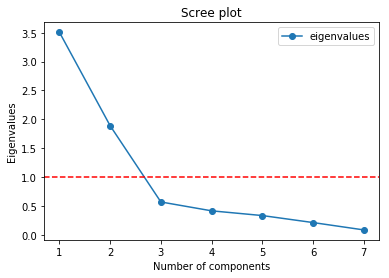

In [6]:
plt.plot(range(1,len(eigenvalues)+1), eigenvalues, label = "eigenvalues", marker='o') 
# Creating the scree plot 

# Naming the x-axis 
plt.xlabel('Number of components') 
# Naming the y-axis 
plt.ylabel('Eigenvalues') 
# Giving a title to the graph 
plt.title('Scree plot') 
# Add a red dotted line at y=1 which is the cut-off value for the Kaiser's rule
plt.axhline(y=1, color='r', linestyle="--")
# Show a legend on the plot 
plt.legend() 
  
# Function to show the plot 
plt.show() 

Using Kaiser's criterion, you can select the number of factors based on variables that have eigenvalues above 1. For the elbow rule, you would select the number of factors when the variance explained by the addition of variables becomes negligible.

Based on the above scree plot, and using either Kaiser's criterion or the elbow rule, decide on the number of factors that you would select. For each method, consider the cumulative percentage of variance explained by the number of factors you include. This will help you decide whether it is feasible to include additional factors into the analysis.

## Factor Analysis

Next, you will perform the factor analysis: first without rotation and then with orthogonal rotation. The analyses will provide you with both the factor loadings as well as the communalities.

For ease, all loadings and communalties will be rounded to two decimals.

### No-rotation factor solution

In [7]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=3,rotation=None,method="ML") # Using maximum likelihood method
fa.fit(X)

# Save them as dataframes and the rows (index) are to be named the columns of X
loadings = pd.DataFrame(fa.loadings_, index=X.columns,)
communalities = pd.DataFrame(fa.get_communalities(), index=X.columns)

In [8]:
loadings.round(2) 

,0,1,2
age,0.60,0.01,0.64
year_emp,0.73,0.10,0.10
income,0.98,0.01,-0.06
debt_income,-0.02,1.00,0.00
cred_debt,0.54,0.66,-0.14
other_debt,0.51,0.74,0.07
risk_score,-0.63,0.20,-0.26


Based on the factor loadings in the unrotated factor solution, think about how each variable loads onto the factors. Are there instances where a variable loads equally on more than one factor? 

**ANSWER:

Age is the variable that loads almost equally on factors one and three. The same is true for Year employed on factors 2 and 3, except that these loading are loading very low.

In [9]:
communalities.round(2)

,0
age,0.77
year_emp,0.55
income,0.97
debt_income,1.00
cred_debt,0.75
other_debt,0.82
risk_score,0.50


The communalities show the proportion of each variable's variance that can be explained by all the factors. 

Notice that the communalities for **income**, **cred_debt** and **other_debt** are all high, with a debt-to-income ratio (or **debt_income**) showing a communality of 1.00. Based on your understanding of communalities, why might this make sense? Think about the variables that are used to calculate the debt-to-income ratio. 

**ANSWER: 

Communality shows how much a variable has in common with other variables in terms of their variance. The high communality makes sense and is particularly highest on the debt-to-income (DTI) ratio beacause the DTI is a function of both income and debt (i.e. DTI= debt/income).    

### Orthogonal-rotated factor solution

Next, you will perform orthogonal rotation on your factor solution.

In [10]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=3,rotation="Varimax",method="ML")
fa.fit(X)

# Save them as dataframes and the rows (index) are to be named the columns of X
loadings = pd.DataFrame(fa.loadings_, index=X.columns,)
communalities = pd.DataFrame(fa.get_communalities(), index=X.columns)

In [11]:
loadings.round(2)

,0,1,2
age,0.11,0.30,0.82
year_emp,0.22,0.60,0.37
income,0.19,0.91,0.32
debt_income,0.98,-0.19,-0.06
cred_debt,0.75,0.44,0.04
other_debt,0.82,0.31,0.22
risk_score,0.09,-0.50,-0.49


Following rotation, how do your factor loadings differ from the unrotated factor solution? Do certain variables now load more highly on specific factors? Are there any variables that loaded highly on more than one factor that are now loading highly onto a single factor?

Lastly, how might you name your factors? Based on the variables that load highly onto each factor, can you conceptually define your factors under one name? There is no right or wrong answer here; rather, it depends on your interpretation of the variables that load onto each factor.

**ANSWER:

The rotation changed the factor loading for Age to load higher on one factor, and we no longer observe cross-loading. However,  the opposite is true for the Risk Score. Now we have similar loadings across two factors for this variable, making interpretation a little more complex.

FACTOR 1: 'Debt Records'

FACTOR 2: 'Financial Profile'

FACTOR 3: 'Personal Profile' It may still be appropriate to use only 2 factors and place the Age under factor 2 and rename it "'Personal Financial Profile'.

In [12]:
communalities.round(2)

,0
age,0.77
year_emp,0.55
income,0.97
debt_income,1.00
cred_debt,0.75
other_debt,0.82
risk_score,0.50


You will notice that the communalities remain the same in the unrotated and rotated factor solution. This makes sense since rotation does not affect the communality values. 